# Navigation

---


In [1]:
from unityagents import UnityEnvironment
from dqn_agent import Agent
import torch
import numpy as np
import random
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# please do not modify the line below
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [6]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

### 4. Train your agent
 
##### Hyperparameters
* BUFFER_SIZE = int(1e5)  # replay buffer size
* BATCH_SIZE = 64         # minibatch size
* GAMMA = 0.99            # discount factor
* TAU = 1e-3              # for soft update of target parameters
* LR = 5e-4               # learning rate 
* n_episodes = 2000       # maximum number of training episodes
* max_t = 1000            # maximum number of time steps per episode
* eps_start = 1.0         # starting value of epsilon, for epsilon-greedy action selection
* eps_end = 0.01          # minimum value of epsilon  
* eps_decay = 0.995       # multiplicative factor (per episode) for decreasing epsilon

In [7]:
agent = Agent(state_size=37, action_size=4, seed=0)

In [8]:


def dqn(n_episodes = 2000, max_t = 1000, eps_start = 1.0, eps_end = 0.01, eps_decay = 0.995):
    """Deep Q-Learning.
    Params
    ======
    n_episodes (int): maximum number of training episodes
    max_t (int): maximum number of time steps per episode
    eps_start (float): starting value of epsilon, for epsilon-greedy action selection
    eps_end (float) : minimum value of epsilon
    eps_decay (float) : multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                     #list containing scores from each episode
    scores_window = deque(maxlen = 100)
    eps = eps_start  #Initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)
        scores.append(score)
        eps = max(eps_end, eps_decay*eps)
        print("\rEpisode {}\tAverage Score: {:.2f}".format(i_episode, np.mean(scores_window)), end ="")
        if i_episode % 100 == 0:
            print("\rEpisode {}\tAverage Score: {:.2f}".format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window) >= 13.0:
            print("\nEnvironment solved in {:d} episodes!\t Average score: {:.2f}".format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores
            

In [9]:
scores = dqn()

Episode 100	Average Score: 0.85
Episode 200	Average Score: 4.87
Episode 300	Average Score: 7.89
Episode 400	Average Score: 10.00
Episode 493	Average Score: 13.04
Environment solved in 493 episodes!	 Average score: 13.04


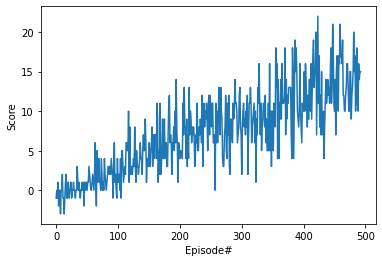

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel("Score")
plt.xlabel("Episode#")
plt.show()

In [11]:
#Load a trained agent
agent.qnetwork_local.load_state_dict(torch.load("checkpoint.pth"))

for i in range(3):
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations[0]
    score = 0
    for j in range(1000):
        action = agent.act(state)
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations[0]
        reward = env_info.rewards[0]
        done = env_info.local_done[0]
        agent.step(state, action, reward, next_state, done)
        state = next_state
        score += reward
        if done:
            break

    print("\rEpisode {}\t Score: {:.2f}".format(i+1, score))

            

Episode 1	 Score: 21.00
Episode 2	 Score: 19.00
Episode 3	 Score: 11.00


### 5. Future ideas to improve the agent's performance

More experiments can be done to increase the performance of agent by applying different extensions of DQN:
* Double DQN (DDQN)
* Prioritized experience replay
* Dueling DQN
* A3C
* Distributional DQN
* Noisy DQN

We can also apply all the abobe extensions together .. using the rainbow DQN method


